## POSTTEST 6

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras import Sequential,layers,optimizers
from sklearn.preprocessing import OrdinalEncoder

Membaca dataset beserta pengaturannya

In [7]:
data = pd.read_csv('bmw.csv',encoding="utf-8")

copy data agar tidak rusak

In [8]:
data_copy = data.copy()

### melakukan Preeprocessing

In [13]:
OrdinalEncoder = OrdinalEncoder()
data_copy["fuelType"] = OrdinalEncoder.fit_transform(data_copy[["fuelType"]])

## SPLIT DATASET 

MELAKUKAN SPLIT DATASET SESUAI YANG DI INGINKAN


In [70]:
x = data_copy[['price','mileage',]]
y = data_copy['fuelType']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 42)

## DNN

MEMBUAT MODEL SEQUENTIAL 

In [71]:
model_seq = Sequential([
   layers.Dense(8, activation='relu',input_shape =(None,2)),
   layers.Dense(16, activation='relu',input_shape =(None,2)),
    layers.Dense(32, activation='relu',input_shape =(None,2)),
    layers.Dense(1, activation='sigmoid',input_shape =(None,2)),
])

SUMARY

In [72]:
model_seq.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, None, 8)           24        
                                                                 
 dense_45 (Dense)            (None, None, 16)          144       
                                                                 
 dense_46 (Dense)            (None, None, 32)          544       
                                                                 
 dense_47 (Dense)            (None, None, 1)           33        
                                                                 
Total params: 745 (2.91 KB)
Trainable params: 745 (2.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Melakukan Compile menggunakan optimizer adam dengan loss menggunakan binary_crossentropy, dengan metrics accuracy

In [73]:
model_seq.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

mealkukan training data epochs 100

In [74]:
history = model_seq.fit(X_train,y_train, epochs=100 ,verbose=1, validation_split=0.2)

Epoch 1/100
216/216 [==============================] - 1s 2ms/step - loss: -11438.7441 - accuracy: 0.0019 - val_loss: -46493.1016 - val_accuracy: 0.0000e+00
Epoch 2/100
216/216 [==============================] - 0s 2ms/step - loss: -370339.6562 - accuracy: 2.8990e-04 - val_loss: -1066156.8750 - val_accuracy: 0.0000e+00
Epoch 3/100
216/216 [==============================] - 0s 2ms/step - loss: -3172190.5000 - accuracy: 0.0084 - val_loss: -6507966.0000 - val_accuracy: 0.0191
Epoch 4/100
216/216 [==============================] - 0s 1ms/step - loss: -12589676.0000 - accuracy: 0.0393 - val_loss: -21470754.0000 - val_accuracy: 0.0441
Epoch 5/100
216/216 [==============================] - 0s 2ms/step - loss: -34545388.0000 - accuracy: 0.0423 - val_loss: -52409220.0000 - val_accuracy: 0.0371
Epoch 6/100
216/216 [==============================] - 0s 2ms/step - loss: -75431648.0000 - accuracy: 0.0333 - val_loss: -106615776.0000 - val_accuracy: 0.0539
Epoch 7/100
216/216 [=======================

MEMBUAT ACURACY SCORE

In [75]:
y_predict = model_seq.predict(X_test)
y_predict = (y_predict > 0.5)
akurasi = accuracy_score(y_test,y_predict)
akurasi

68/68 [==============================] - 0s 774us/step


0.039406583217431616

MODEL TERSEBUT DI EVALUASI 

In [76]:
model_seq.evaluate(X_test, y_test)

68/68 [==============================] - 0s 915us/step - loss: -1214955913216.0000 - accuracy: 0.0394


[-1214955913216.0, 0.039406582713127136]

## GRAFIK

MEANMPILKAN GRAFIK AKURASI

In [77]:
import matplotlib.pyplot as plt

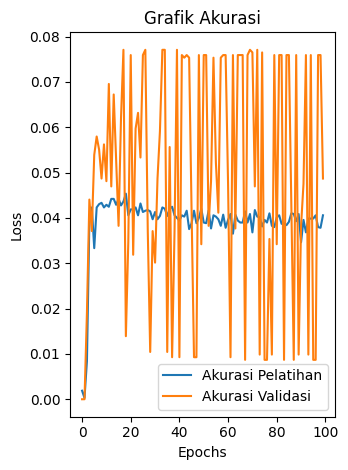

In [78]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label = 'Akurasi Validasi')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Grafik Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

MENAMPILKAN GRAFIK LOSS

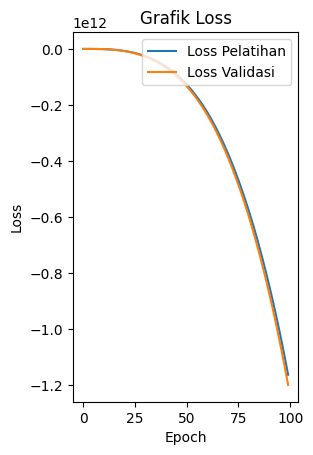

In [79]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Grafik Loss')
plt.show()